# CROSS VALIDATION, INCREASE DATA INPUTS, CHECK FOR RANDOM GRAPHS

## Importing necessary modules:

In [37]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Reading in data:

In [3]:
# data = sp.genfromtxt("graphs.csv", delimiter=',')
data = pd.read_csv("graphs2 wodwm.csv", header=None)
data.columns = ['|V|', '|E|', 'max_deg', 'avg_deg', 'min_deg', 'chrom_num']
print(data[:10])

   |V|    |E|  max_deg  avg_deg  min_deg  chrom_num
0  450   8169       94    36.31        1         15
1  450  16680      139    74.13       18         15
2  450  16750      138    74.44       18         15
3  450   8260      128    36.71        2         25
4  450   8263      111    36.72        2         25
5  450  17343      179    77.08        7         25
6  450  17425      157    77.44       11         25
7  450   5714       42    25.40       13          5
8  450   5734       42    25.48       12          5
9  450   9803       66    43.57       27          5


In [4]:
print(data.columns)

Index(['|V|', '|E|', 'max_deg', 'avg_deg', 'min_deg', 'chrom_num'], dtype='object')


In [5]:
x = data[['|V|', '|E|', 'max_deg', 'avg_deg', 'min_deg']]
y = data[['chrom_num']]

In [6]:
print(x)

    |V|    |E|  max_deg  avg_deg  min_deg
0   450   8169       94    36.31        1
1   450  16680      139    74.13       18
2   450  16750      138    74.44       18
3   450   8260      128    36.71        2
4   450   8263      111    36.72        2
5   450  17343      179    77.08        7
6   450  17425      157    77.44       11
7   450   5714       42    25.40       13
8   450   5734       42    25.48       12
9   450   9803       66    43.57       27
10  450   9757       68    43.36       29
11    4      6        3     3.00        3
12    5     10        4     4.00        4
13    4      4        3     2.00        1
14    5      7        4     2.80        2


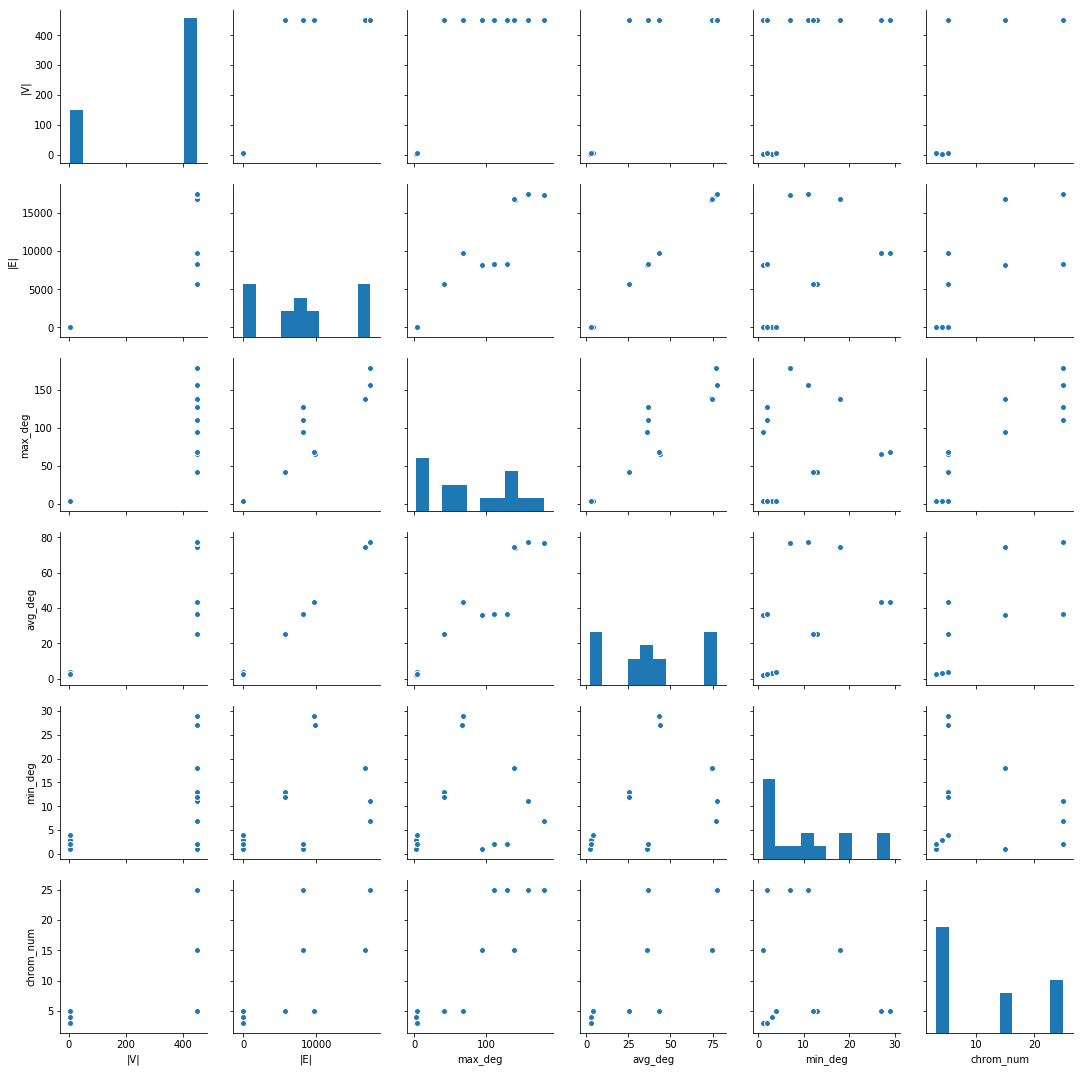

In [7]:
sns.pairplot(data)

E:\Programming\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


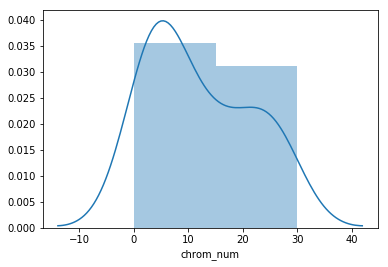

In [8]:
sns.distplot(data['chrom_num'], hist_kws={'range':(0,30)})

## Function error definition

### calcs error !

In [9]:
# def error(f, x, y, z):
#     return sp.sum((f(x,y)-z)**2)

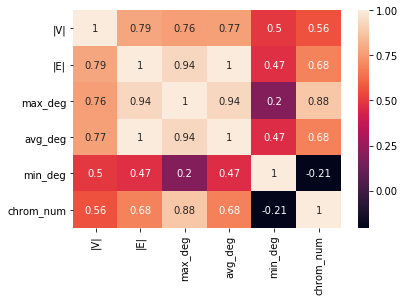

In [10]:
sns.heatmap(data.corr(),annot=True)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y))

In [31]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
cdf = pd.DataFrame(lm.coef_)

In [33]:
predictions = np.rint(lm.predict(x_test))

In [34]:
print(predictions)
print(y_test)

[[21.]
 [18.]
 [28.]
 [ 5.]]
[[25]
 [15]
 [25]
 [ 5]]


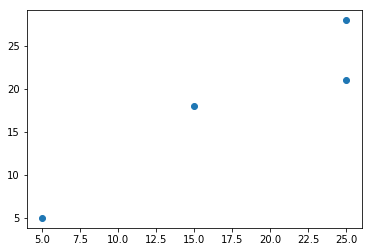

In [35]:
plt.scatter(y_test, predictions)

In [39]:
def root_mean_squared_error(y_true, pred):
    print(sqrt(metrics.mean_squared_error(y_true, pred)))

In [40]:
root_mean_squared_error(y_test, predictions)

2.9154759474226504


In [41]:
metrics.accuracy_score(y_test, predictions)

0.25